# Results

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# plt.style.use('fivethirtyeight')
sns.set(style="whitegrid")

## Beijing A

Text(0.5, 1.0, 'Average Test Performances Using Nested Cross Val on Beijing A.')

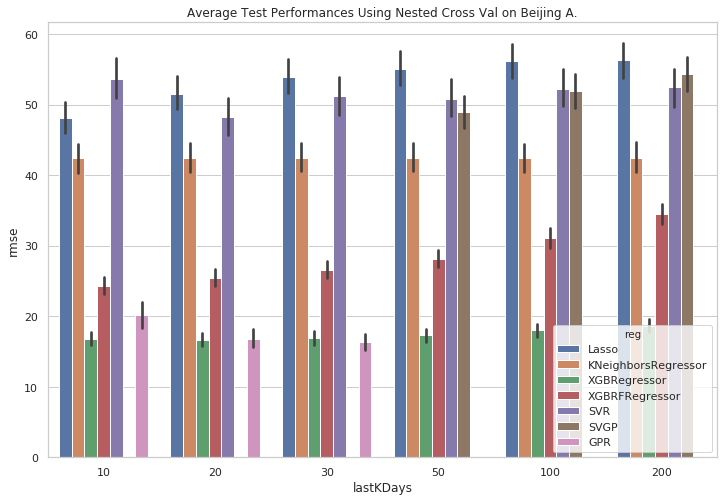

In [2]:
temp = []
for reg in ['las', 'knn', 'xgb', 'xgbRF', 'svr', 'gpST']:
    try:
        odf = pd.read_csv(f"./results/beijinga_scaled/{reg}/final.csv")
        temp.append(odf[odf["is_val_error"] == False])
    except:
        pass
df = pd.concat(temp)

plt.figure(figsize=(12, 8))
sns.barplot(data=df, x = "lastKDays", y="rmse", hue="reg")
plt.title(f"Average Test Performances Using Nested Cross Val on Beijing A.")

In [4]:
df.groupby(["lastKDays", "reg"]).mean()

is_val_error  stepSize      kout  kin  \
lastKDays reg                                                          
10        GPR                         False       2.0  2.522655 -1.0   
          KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRFRegressor              False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
20        GPR                         False       2.0  2.494565 -1.0   
          KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRFRegressor              False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
30        GPR                         False       2.0  2.515385 -1.0   
          KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRFRegressor              False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
50        KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVGP                        False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRFRegressor              False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
100       KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVGP                        False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRFRegressor              False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
200       KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVGP                        False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRFRegressor              False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   

                                  time_ix  hy_ix       rmse        mae  
lastKDays reg                                                           
10        GPR                  194.850369   -1.0  20.234332  16.865000  
          KNeighborsRegressor  193.000000    9.0  42.431840  38.463890  
          Lasso                193.000000    7.0  48.077507  44.536952  
          SVR                  193.000000    5.0  53.659648  49.722569  
          XGBRFRegressor       193.000000   12.0  24.308331  20.369007  
          XGBRegressor         193.000000   12.0  16.820791  13.007565  
20        GPR                  193.873913   -1.0  16.796107  13.413240  
          KNeighborsRegressor  193.000000    9.0  42.475588  38.503464  
          Lasso                193.000000    7.0  51.546910  47.966142  
          SVR                  193.000000    5.0  48.240261  44.230568  
          XGBRFRegressor       193.000000   12.0  25.434430  21.488283  
          XGBRegressor         193.000000   12.0  16.682750  12.921596  
30        GPR                  192.419780   -1.0  16.288170  12.894913  
          KNeighborsRegressor  193.000000    9.0  42.475588  38.503464  
          Lasso                193.000000    7.0  53.955834  50.392806  
          SVR                  193.000000    5.0  51.

## Beijing B

Text(0.5, 1.0, 'Average Test Performances Using Nested Cross Val on Beijing B.')

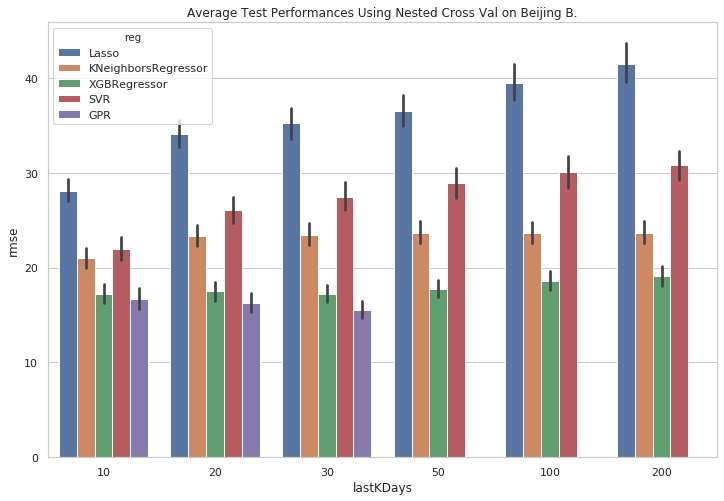

In [7]:
temp = []
for reg in ['las', 'knn', 'xgb', 'xgbRF', 'svr', "gpFULL"]:
    try:
        odf = pd.read_csv(f"./results/beijingb_scaled/{reg}/final.csv")
        temp.append(odf[odf["is_val_error"] == False])
    except:
        pass
df = pd.concat(temp)

plt.figure(figsize=(12, 8))
sns.barplot(data=df, x = "lastKDays", y="rmse", hue="reg")
plt.title(f"Average Test Performances Using Nested Cross Val on Beijing B.")

In [8]:
df.groupby(["lastKDays", "reg"]).mean()

is_val_error  stepSize      kout  kin  \
lastKDays reg                                                          
10        GPR                         False       2.0  2.518947 -1.0   
          KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
20        GPR                         False       2.0  2.520879 -1.0   
          KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
30        GPR                         False       2.0  2.514739 -1.0   
          KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
50        KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
100       KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
200       KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   

                                  time_ix  hy_ix       rmse        mae  
lastKDays reg                                                           
10        GPR                  194.345263   -1.0  16.691106  13.144337  
          KNeighborsRegressor  193.000000    9.0  21.008332  16.236408  
          Lasso                193.000000    7.0  28.128604  23.345789  
          SVR                  193.000000    5.0  22.005239  17.376902  
          XGBRegressor         193.000000   12.0  17.239761  13.284435  
20        GPR                  191.942857   -1.0  16.253796  12.679077  
          KNeighborsRegressor  193.000000    9.0  23.356580  18.296314  
          Lasso                193.000000    7.0  34.100062  29.533959  
          SVR                  193.000000    5.0  26.036364  21.227913  
          XGBRegressor         193.000000   12.0  17.543402  13.583216  
30        GPR                  190.324263   -1.0  15.568837  12.313509  
          KNeighborsRegressor  193.000000    9.0  23.485494  18.427939  
          Lasso                193.000000    7.0  35.216964  30.421231  
          SVR                  193.000000    5.0  27.494888  22.500702  
          XGBRegressor         193.000000   12.0  17.205029  13.341834  
50        KNeighborsRegressor  193.000000    9.0  23.687472  18.561518  
          Lasso                193.000000    7.0  36.501508  31.653080  
          SVR                  193.000000    5.0  28.927250  23.850166  
          XGBRegressor         193.000000   12.0  17.736480  13.842751  
100       KNeighborsRegressor  193.000000    9.0  23.673317  18.546391  
          Lasso                193.000000    7.0  39.490494  34.789672  
          SVR                  193.000000    5.0  30.046284  24.962151  
          XGBRegressor         193.000000   12.0  18.565166  14.564307  
200       KNeighborsRegressor  193.000000    9.0  23.673547  18.547335  
          Lasso                193.000000   